## Web Crawling
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지 
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

#### 크롤링 방법에 따른 속도
- requests json > requests html >>>>> selenium

### Crawling Naver Stock Datas
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : url : chrome devtool  
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [1]:
import requests
import pandas as pd

#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [28]:
page_size, page = 60, 1
URL = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'
URL

'https://m.stock.naver.com/api/index/KOSPI/price?pageSize=60&page=1'

#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [29]:
response = requests.get(URL)
response

<Response [200]>

In [30]:
type(response)

requests.models.Response

In [31]:
type(response.text), response.text[:100]

(str,
 '[{"localTradedAt":"2024-09-19","closePrice":"2,580.80","compareToPreviousClosePrice":"5.39","compare')

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [32]:
data = response.json()
type(data), data[:2]

(list,
 [{'localTradedAt': '2024-09-19',
   'closePrice': '2,580.80',
   'compareToPreviousClosePrice': '5.39',
   'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
   'fluctuationsRatio': '0.21',
   'openPrice': '2,594.67',
   'highPrice': '2,598.68',
   'lowPrice': '2,550.09'},
  {'localTradedAt': '2024-09-13',
   'closePrice': '2,575.41',
   'compareToPreviousClosePrice': '3.32',
   'compareToPreviousPrice': {'code': '2', 'text': '상승', 'name': 'RISING'},
   'fluctuationsRatio': '0.13',
   'openPrice': '2,571.81',
   'highPrice': '2,584.11',
   'lowPrice': '2,562.91'}])

In [33]:
df = pd.DataFrame(data)
df = df[['localTradedAt', 'closePrice']]
df.tail(2)

,localTradedAt,closePrice
58,2024-06-25,"2,774.39"
59,2024-06-24,"2,764.73"


#### 4. 함수로 만들기

In [34]:
def stock_price(page=1, pagesize=60) -> pd.DataFrame:
    url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data)[['localTradedAt', 'closePrice']]

In [35]:
stock_price()

,localTradedAt,closePrice
0,2024-09-19,"2,580.80"
1,2024-09-13,"2,575.41"
2,2024-09-12,"2,572.09"
3,2024-09-11,"2,513.37"
4,2024-09-10,"2,523.43"
5,2024-09-09,"2,535.93"
6,2024-09-06,"2,544.28"
7,2024-09-05,"2,575.50"
8,2024-09-04,"2,580.80"
9,2024-09-03,"2,664.63"


In [4]:
def stock_price(code='KOSPI' ,page=1, pagesize=60) -> pd.DataFrame:
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={pagesize}&page={page}'
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data)[['localTradedAt', 'closePrice']]

In [5]:
# 코스닥 데이터 수집
stock_price('KOSDAQ', 1, 60)

,localTradedAt,closePrice
0,2024-09-20,750.00
1,2024-09-19,739.51
2,2024-09-13,733.20
3,2024-09-12,731.03
4,2024-09-11,709.42
5,2024-09-10,706.20
6,2024-09-09,714.46
7,2024-09-06,706.59
8,2024-09-05,725.28
9,2024-09-04,731.75


#### 5. 원달러 환율 데이터 수집 : 실습

In [14]:
page, pagesize = 1, 60
dollar = f'https://m.stock.naver.com/front-api/marketIndex/prices?\
category=exchange&reutersCode=FX_USDKRW&page={page}&pageSize={pagesize}'
response = requests.get(dollar)
data = response.json()
df = pd.DataFrame(data['result'])[['localTradedAt', 'closePrice']]
df.tail(5)

,localTradedAt,closePrice
55,2024-07-01,"1,384.50"
56,2024-06-28,"1,382.00"
57,2024-06-27,"1,387.50"
58,2024-06-26,"1,394.50"
59,2024-06-25,"1,392.00"


In [15]:
def exchange_rate(code='FX_USDKRW', page=1, pagesize=60):
    url = f'https://m.stock.naver.com/front-api/marketIndex/prices?\
category=exchange&reutersCode={code}&page={page}&pageSize={pagesize}'

    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data['result'])[['localTradedAt', 'closePrice']]

exchange_rate(pagesize=30)

,localTradedAt,closePrice
0,2024-09-20,"1,330.40"
1,2024-09-19,"1,330.00"
2,2024-09-13,"1,332.00"
3,2024-09-12,"1,339.00"
4,2024-09-11,"1,340.50"
5,2024-09-10,"1,344.50"
6,2024-09-09,"1,342.00"
7,2024-09-06,"1,339.50"
8,2024-09-05,"1,335.00"
9,2024-09-04,"1,336.50"


#### 6. 시각화

In [41]:
# 데이터 수집
pagesize = 30
kp_df = stock_price('KOSPI', pagesize=pagesize).iloc[::-1]
kd_df = stock_price('KOSDAQ', pagesize=pagesize).iloc[::-1]
usd_df = exchange_rate(pagesize=pagesize).iloc[::-1]

In [42]:
# 데이터 전처리
# kp_df['closePrice'] = kp_df['closePrice'].apply(lambda data: float(data.replace(',', '')))
# kd_df['closePrice'] = kd_df['closePrice'].apply(lambda data: float(data.replace(',', '')))
# usd_df['closePrice'] = usd_df['closePrice'].apply(lambda data: float(data.replace(',', '')))

kp_df['closePrice'] = kp_df['closePrice'].str.replace(',', '').astype(float)
kd_df['closePrice'] = kd_df['closePrice'].str.replace(',', '').astype(float)
usd_df['closePrice'] = usd_df['closePrice'].str.replace(',', '').astype(float)

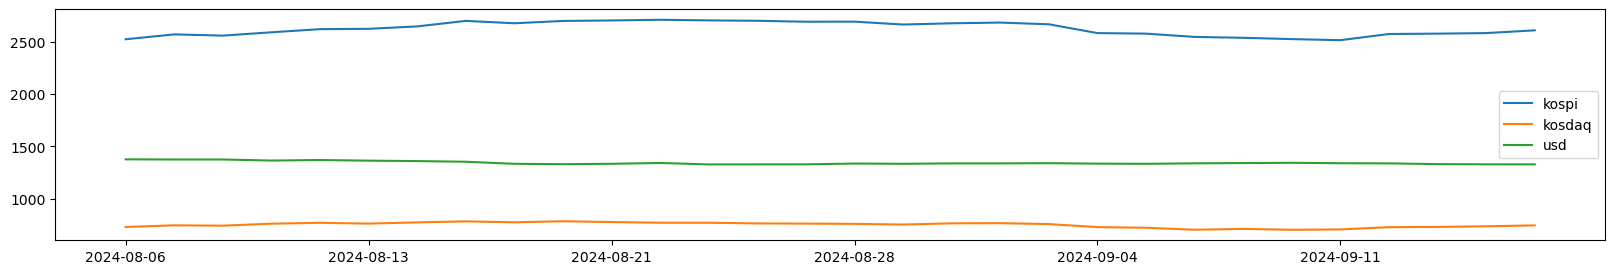

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.plot(kp_df['localTradedAt'], kp_df['closePrice'], label = 'kospi')
plt.plot(kd_df['localTradedAt'], kd_df['closePrice'], label = 'kosdaq')
plt.plot(usd_df['localTradedAt'], usd_df['closePrice'], label = 'usd')

plt.xticks(kp_df['localTradedAt'][::5])

plt.legend()
plt.show()

#### 7. 데이터 스케일링
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

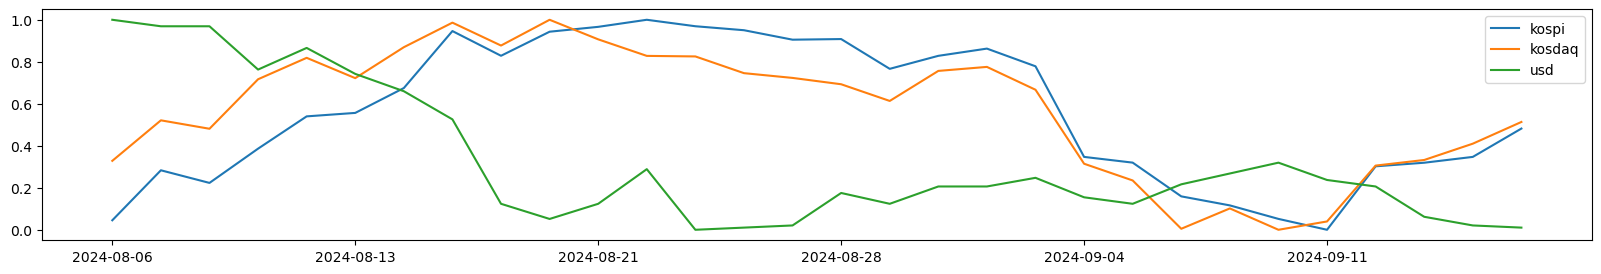

In [44]:
from sklearn.preprocessing import minmax_scale

plt.figure(figsize=(20, 3))
plt.plot(kp_df['localTradedAt'], minmax_scale(kp_df['closePrice']), label = 'kospi')
plt.plot(kd_df['localTradedAt'], minmax_scale(kd_df['closePrice']), label = 'kosdaq')
plt.plot(usd_df['localTradedAt'], minmax_scale(usd_df['closePrice']), label = 'usd')

plt.xticks(kp_df['localTradedAt'][::5])

plt.legend()
plt.show()

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임
    - 1에 가까울수록 서로 같은방향으로 움직임
    - 0에 가까울수록 두 데이터는 관계가 없음

In [47]:
# 데이터 전처리 : merge

merge_df = (pd.merge(kp_df, kd_df, on='localTradedAt')
            .merge(usd_df, on='localTradedAt'))

merge_df.columns = ['date', 'kospi', 'kosdaq', 'usd']
merge_df.tail(2)

,date,kospi,kosdaq,usd
28,2024-09-19,2580.80,739.51,1330.0
29,2024-09-20,2607.02,747.91,1329.5


In [49]:
merge_df[['kospi', 'kosdaq', 'usd']].corr()

,kospi,kosdaq,usd
kospi,1.000000,0.881504,-0.358588
kosdaq,0.881504,1.000000,0.028777
usd,-0.358588,0.028777,1.000000


In [50]:
# kospi와 kosdaq의 상관계수는 매우 강한 양의 관계가 있고,
# kospi와 usd의 상관계수는 중간 정도의 음의 관계가 있고,
# kosdaq과 usd는 서로 관계가 없다.

In [51]:
# 원달러 환율이 높으면 달러를 원화로 환전하여 KOSPI 지수를 구매한다.
# 원달러 환율이 낮으면 KOSPI 지수를 판매하여 달러로 환전한다.